# This notebook is for the Fair-Shapely experiment

In [ ]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [ ]:
from src.data.unified_dataloader import load_dataset

a, processed_compas = load_dataset('compas')

In [ ]:
processed_compas.head(3)

### 3. Split label/unlabel data, split train/test data.

In [ ]:
'''COMPAS'''
df = processed_compas.copy()
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']

In [ ]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='compas', fairshap_base='DR',matching_method='NN')

### 4. read saved_csv file and make plots. FairSHAP(DR), threshold=0.05

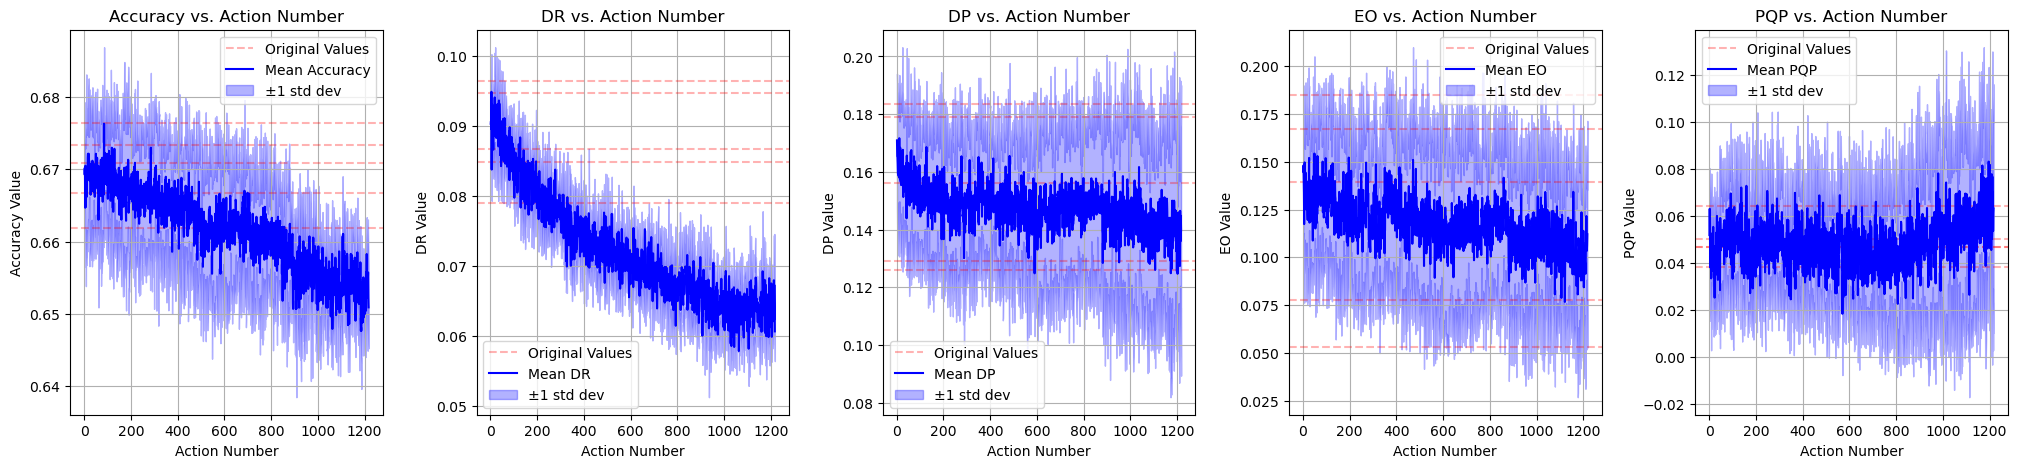

In [1]:
import pandas as pd
import numpy as np
from src.visualization.visualization2 import plot_results

def extract_original_values(fold):
    original_accuracy = fold.loc[0, 'new_accuracy']
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    # original_recall = fold.loc[0, 'new_recall']
    # original_precision = fold.loc[0, 'new_precision']
    # original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_accuracy, original_DR, original_DP, original_EO, original_PQP

# fold1 = pd.read_csv('saved_results/compas/fairSHAP-DR_1-fold_results.csv')
# fold2 = pd.read_csv('saved_results/compas/fairSHAP-DR_2-fold_results.csv')
# fold3 = pd.read_csv('saved_results/compas/fairSHAP-DR_3-fold_results.csv')
# fold4 = pd.read_csv('saved_results/compas/fairSHAP-DR_4-fold_results.csv')
# fold5 = pd.read_csv('saved_results/compas/fairSHAP-DR_5-fold_results.csv')
fold1 = pd.read_csv('saved_results/compas/fairSHAP-DR_0.05_NN_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/compas/fairSHAP-DR_0.05_NN_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/compas/fairSHAP-DR_0.05_NN_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/compas/fairSHAP-DR_0.05_NN_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/compas/fairSHAP-DR_0.05_NN_5-fold_results.csv')
# fold1 = pd.read_csv('saved_results/compas/fairSHAP-DR_OT_1-fold_results.csv')
# fold2 = pd.read_csv('saved_results/compas/fairSHAP-DR_OT_2-fold_results.csv')
# fold3 = pd.read_csv('saved_results/compas/fairSHAP-DR_OT_3-fold_results.csv')
# fold4 = pd.read_csv('saved_results/compas/fairSHAP-DR_OT_4-fold_results.csv')
# fold5 = pd.read_csv('saved_results/compas/fairSHAP-DR_OT_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_accuracy = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_drs = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_dps = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_eos = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_pqps = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
# original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]

plot_results(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=None,
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3
)

In [2]:
fold_last_rows = [
    fold1.iloc[-1], 
    fold2.iloc[-1], 
    fold3.iloc[-1], 
    fold4.iloc[-1], 
    fold5.iloc[-1]
]

# Convert to DataFrame for calculating mean and std
df_last_rows = pd.DataFrame(fold_last_rows)

# Calculate mean and std for each column
mean_values = df_last_rows.mean()
std_values = df_last_rows.std()

# Combine into a new DataFrame showing "mean ± std" format
result_df = pd.DataFrame({
    "Mean": mean_values,
    "Std": std_values,
    "Mean ± Std": mean_values.round(4).astype(str) + " ± " + std_values.round(4).astype(str)
})
result_df

,Mean,Std,Mean ± Std
action_number,1175.400000,177.380382,1175.4 ± 177.3804
new_accuracy,0.660937,0.010594,0.6609 ± 0.0106
new_DR,0.062887,0.009055,0.0629 ± 0.0091
new_DP,0.132605,0.040672,0.1326 ± 0.0407
new_EO,0.098463,0.060275,0.0985 ± 0.0603
new_PQP,0.045198,0.038261,0.0452 ± 0.0383


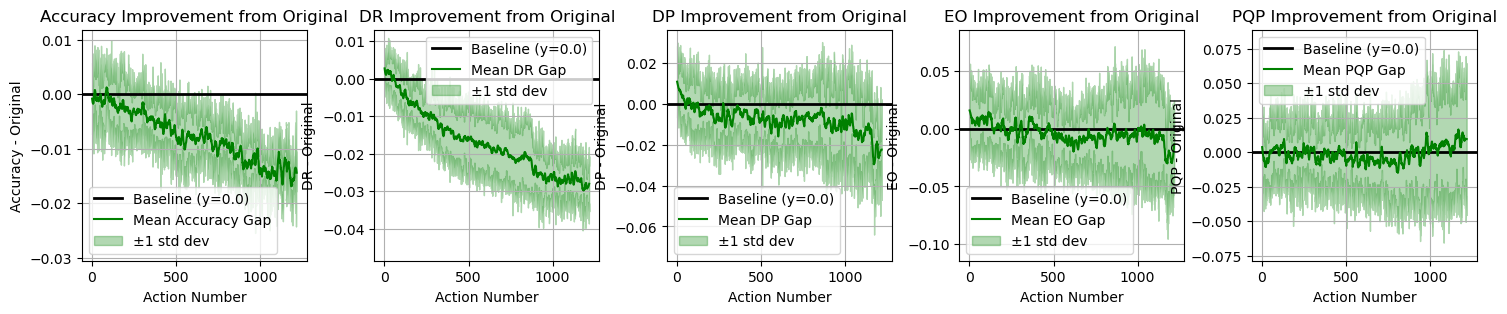

In [3]:
from src.visualization.visualization1 import plot_fairness_improvement

plot_fairness_improvement(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    baseline=0.0,
    figsize=(18,3),
    fill_alpha=0.3,
    fill_color='g',
    smooth_window=20,
    smooth_polyorder=2,
)

### 4.3 DP （future work）

### 4.4 EO (future work)